In [8]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, CategoricalNB
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:

# Data directories
train_dir = '/content/drive/MyDrive/DR_50/Train'
test_dir = '/content/drive/MyDrive/DR_50/Test'
valid_dir = '/content/drive/MyDrive/DR_50/Valid'

In [11]:
# Image dimensions
img_width, img_height = 300, 300  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 20

In [12]:

# Load model for feature extraction
model = ResNet50(weights='imagenet', include_top=False)

In [13]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = (img_data)
    features = model.predict(img_data)
    return features

In [14]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 193ms/step


In [15]:
# Evaluate on test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 1s 657ms/step


In [16]:
# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

Training Bernoulli Naive Bayes...
Performance metrics for Bernoulli Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       1.00      0.60      0.75         5
           2       0.43      0.60      0.50         5
           3       0.33      0.40      0.36         5
           4       1.00      1.00      1.00         5

    accuracy                           0.60        25
   macro avg       0.65      0.60      0.61        25
weighted avg       0.65      0.60      0.61        25

Accuracy: 0.6
Sensitivity: 0.6
Precision: 0.6523809523809524
F1 Score: 0.6116161616161616



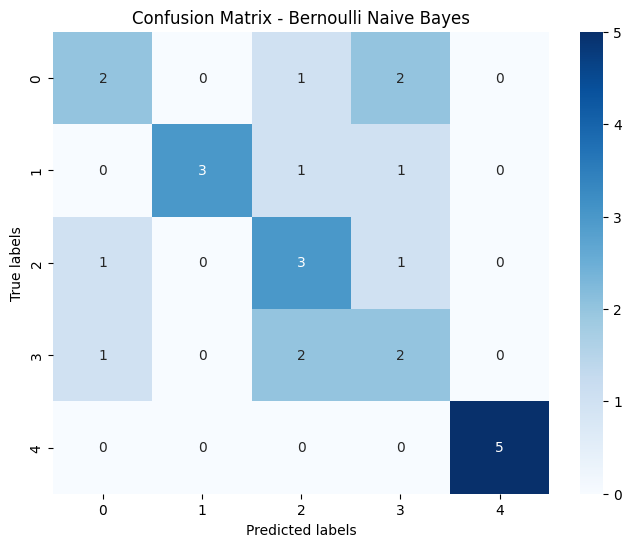

Training Multinomial Naive Bayes...
Performance metrics for Multinomial Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       1.00      0.60      0.75         5
           2       0.60      0.60      0.60         5
           3       0.29      0.40      0.33         5
           4       1.00      1.00      1.00         5

    accuracy                           0.60        25
   macro avg       0.66      0.60      0.62        25
weighted avg       0.66      0.60      0.62        25

Accuracy: 0.6
Sensitivity: 0.6
Precision: 0.6571428571428571
F1 Score: 0.6166666666666667



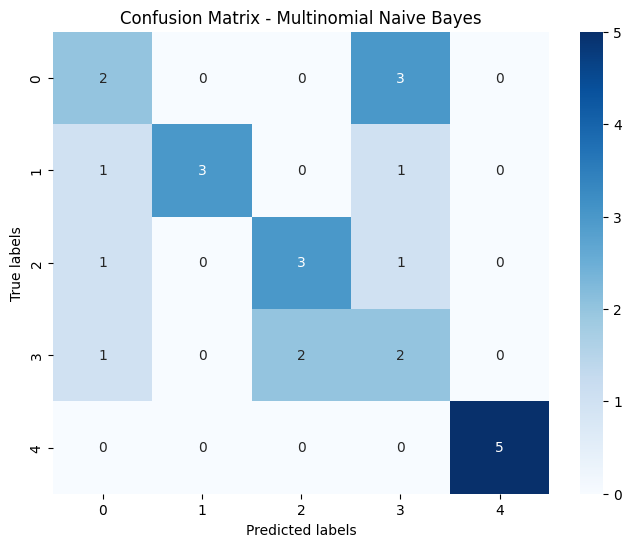

Training Complement Naive Bayes...
Performance metrics for Complement Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.80      0.80      0.80         5
           2       1.00      0.40      0.57         5
           3       0.33      0.40      0.36         5
           4       0.71      1.00      0.83         5

    accuracy                           0.60        25
   macro avg       0.65      0.60      0.59        25
weighted avg       0.65      0.60      0.59        25

Accuracy: 0.6
Sensitivity: 0.6
Precision: 0.6495238095238096
F1 Score: 0.5936796536796537



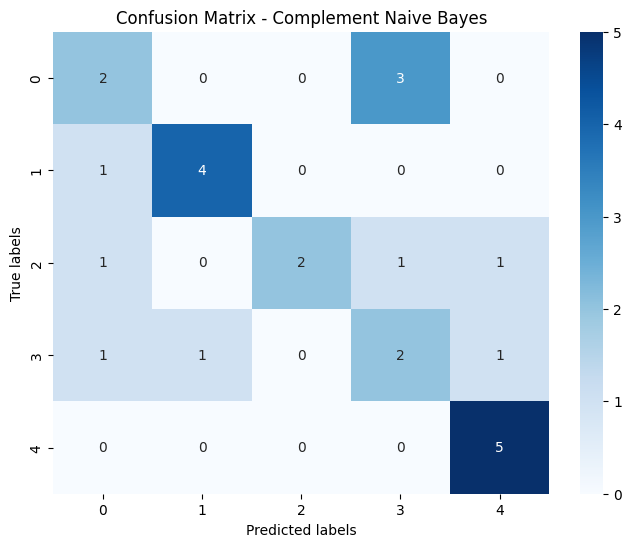

Training Gaussian Naive Bayes...
Performance metrics for Gaussian Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.80      0.80      0.80         5
           2       0.75      0.60      0.67         5
           3       0.50      0.40      0.44         5
           4       0.71      1.00      0.83         5

    accuracy                           0.64        25
   macro avg       0.63      0.64      0.63        25
weighted avg       0.63      0.64      0.63        25

Accuracy: 0.64
Sensitivity: 0.64
Precision: 0.6328571428571429
F1 Score: 0.6288888888888889



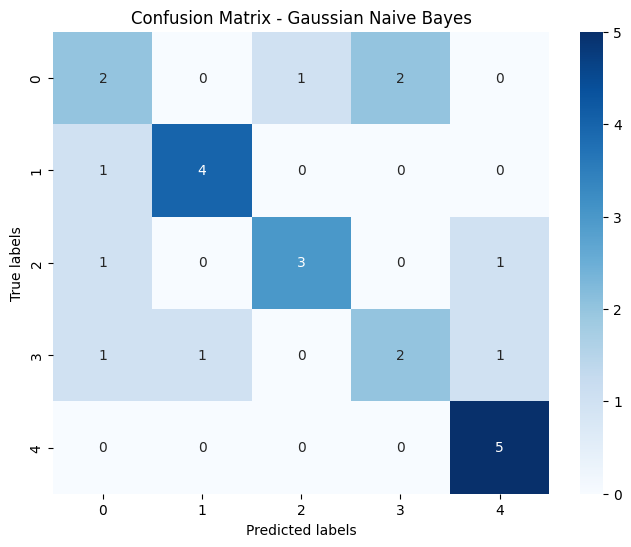

In [21]:
# List of classifiers to try
from sklearn.naive_bayes import GaussianNB

classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    # Train classifier
    clf.fit(x_train_flat, y_train)
    # Predict on test set
    y_pred = clf.predict(x_test_flat)
    # Print performance metrics
    print(f'Performance metrics for {clf_name}:')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
     # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}\n')
       # Plot confusion matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
    cm = confusion_matrix(y_test, y_pred)

    #heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
